# Titanic-Death-Analysis
## Author - Hari Vigneshwaran S

This is an analysis of Deaths happened in the Titanic accident, and visualising it.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<AxesSubplot: >

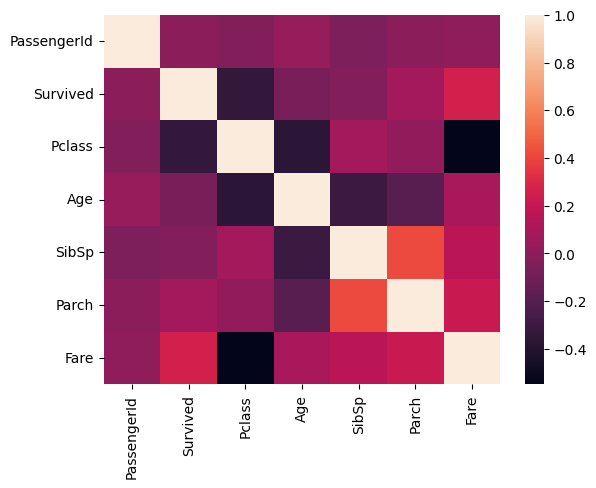

In [7]:
sns.heatmap(df_train.corr())

In [8]:
corr_mat = df_train.corr()
corr_mat['Survived'].sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [9]:
df_train.groupby('Pclass').mean()['Survived']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [10]:
df_train.groupby('Sex').sum()['Survived']

Sex
female    233
male      109
Name: Survived, dtype: int64

In [11]:
df_train.groupby('SibSp').mean()['Survived']

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [12]:
df_train.groupby('Parch').mean()['Survived'].sort_values(ascending=False)

Parch
3    0.600000
1    0.550847
2    0.500000
0    0.343658
5    0.200000
4    0.000000
6    0.000000
Name: Survived, dtype: float64

In [13]:
df_train['Died'] = 1 - df_train['Survived']

<AxesSubplot: xlabel='Sex'>

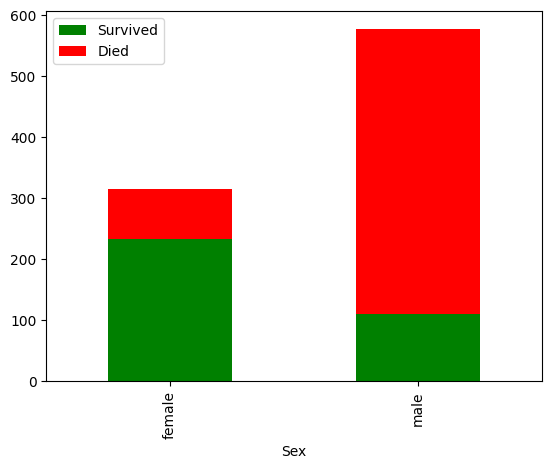

In [14]:
df_train.groupby('Sex').sum()[['Survived','Died']].plot.bar(stacked=True,color=['g','r'])

<AxesSubplot: xlabel='Sex'>

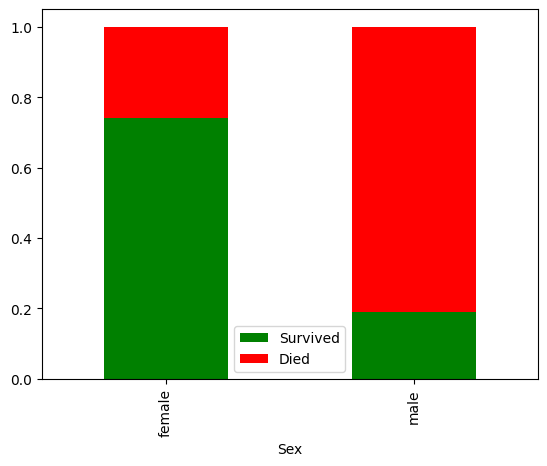

In [15]:
df_train.groupby('Sex').mean()[['Survived','Died']].plot.bar(stacked=True,color=['g','r'])

<AxesSubplot: xlabel='Pclass'>

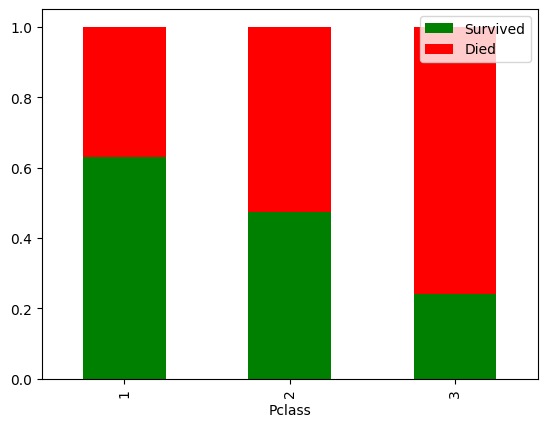

In [16]:
df_train.groupby('Pclass').mean()[['Survived','Died']].plot.bar(stacked=True,color=['g','r'])

In [17]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

/Users/harivigneshwaran/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Fare'>

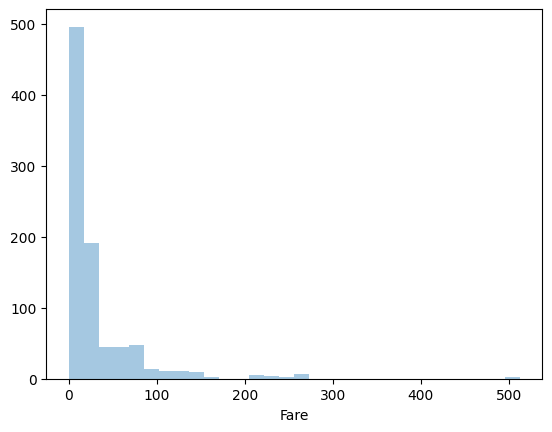

In [18]:
sns.distplot(df_train['Fare'],bins=30,kde=False)

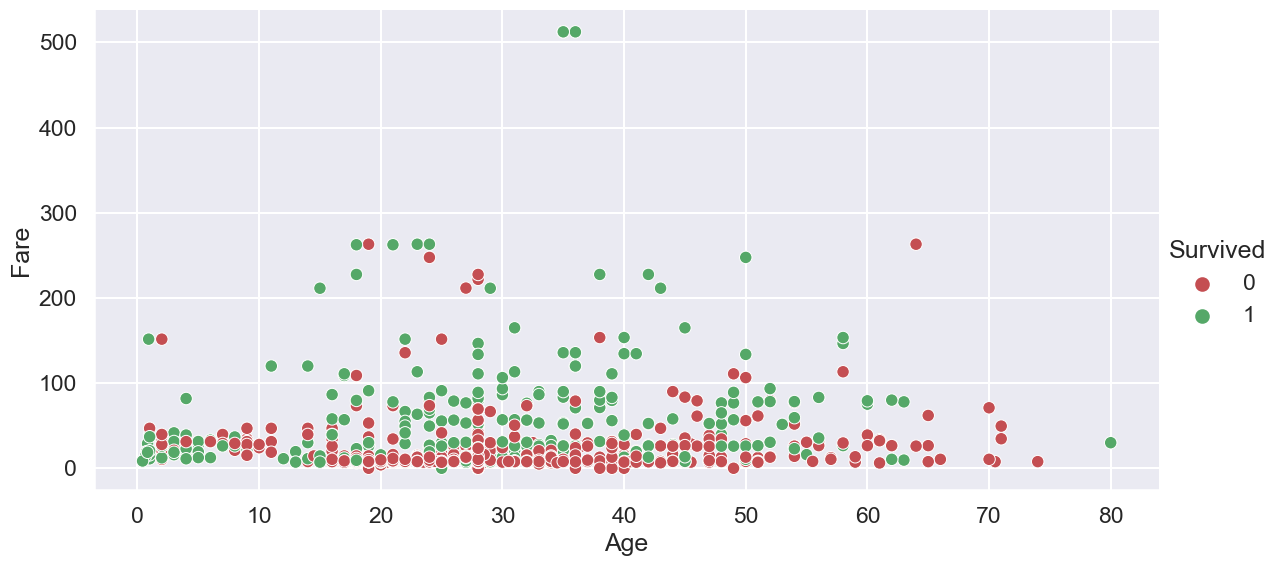

In [19]:
sns.set()
sns.set_context("talk")
sns.relplot(x='Age',y='Fare',hue='Survived',data = df_train,height=6,aspect=2,palette={0: "r", 1: "g"})

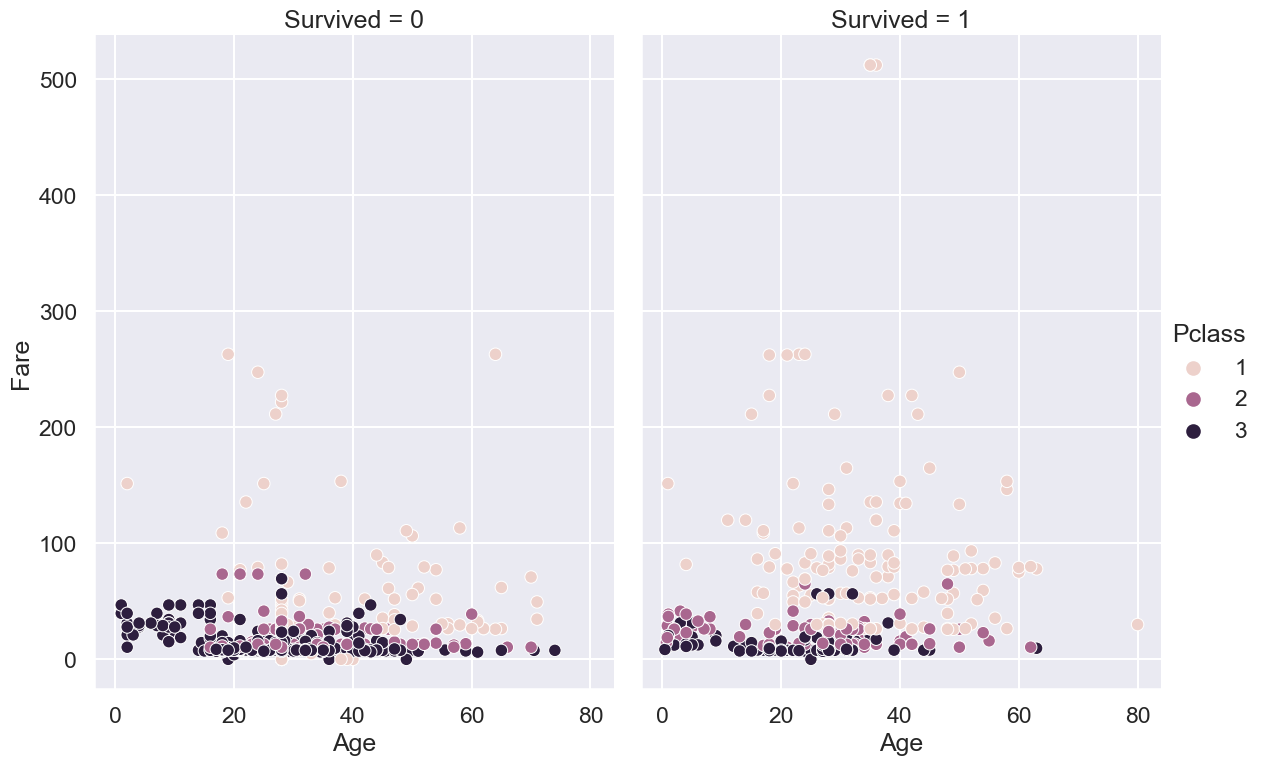

In [20]:
sns.relplot(x='Age',y='Fare',data=df_train,aspect=.75,hue='Pclass',col = 'Survived',height=8)

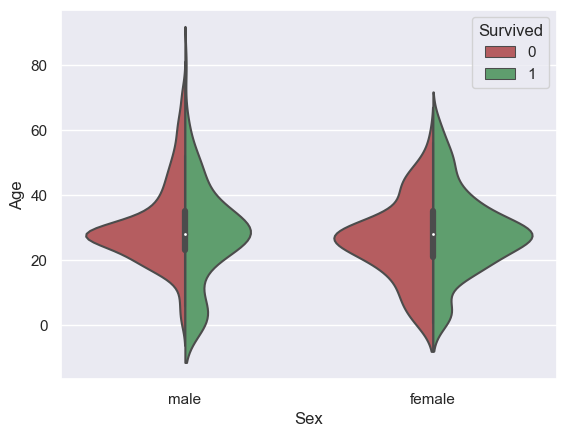

In [21]:
sns.set()
sns.set_context("notebook")
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=df_train, 
               split=True,
               palette={0: "r", 1: "g"}
           );

As we saw in the chart above and validate by the following:

Women survive more than men, as depicted by the larger female green histogram
Now, we see that:

The age conditions the survival for male passengers:

Younger male tend to survive
A large number of passengers between 20 and 40 succumb
The age doesn't seem to have a direct impact on the female survival

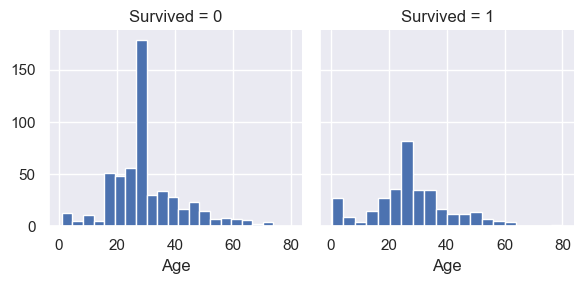

In [22]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/Users/harivigneshwaran/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


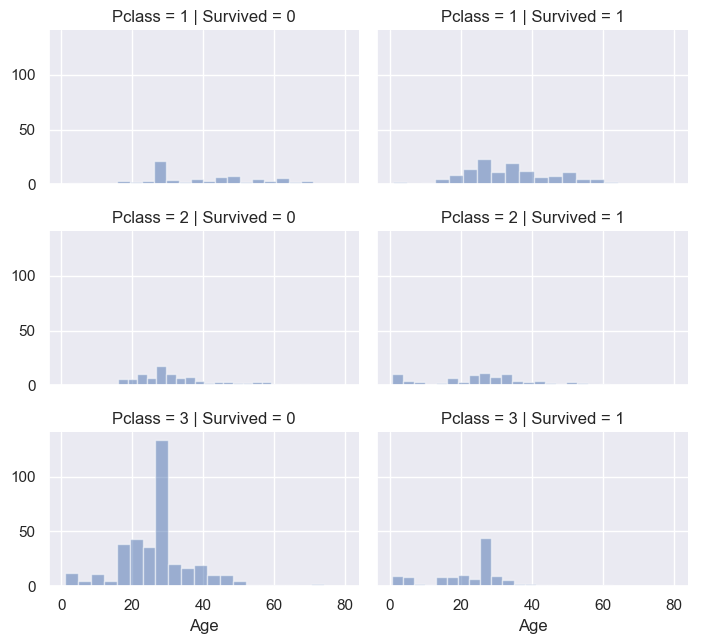

In [23]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

<AxesSubplot: xlabel='Embarked,Sex'>

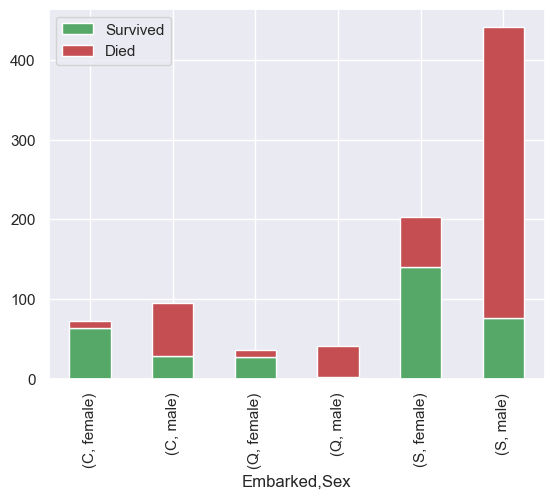

In [24]:
df_train.groupby(['Embarked','Sex']).sum()[['Survived','Died']].plot.bar(stacked=True,color=['g','r'])

In [25]:
df_train.groupby(['Embarked','Pclass','Sex']).sum()[['Survived','Died']]

Survived  Died
Embarked Pclass Sex                   
C        1      female        42     1
                male          17    25
         2      female         7     0
                male           2     8
         3      female        15     8
                male          10    33
Q        1      female         1     0
                male           0     1
         2      female         2     0
                male           0     1
         3      female        24     9
                male           3    36
S        1      female        46     2
                male          28    51
         2      female        61     6
                male          15    82
         3      female        33    55
                male          34   231

## For future analysis lets keep this notebook continued